In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
species_sample_one = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Aetheopicum/STAR_out_Saet3_apices-1/ReadsPerGene.out.tab', sep = '\t', names = ['Gene','Count'], usecols = [0,1], skiprows=4)
species_sample_two = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Aetheopicum/STAR_out_Saet3_apices-2/ReadsPerGene.out.tab', sep = '\t', names = ['Gene','Count'], usecols = [0,1], skiprows=4)
species_sample_three = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Aetheopicum/STAR_out_Saet3_apices-3/ReadsPerGene.out.tab', sep = '\t', names = ['Gene','Count'], usecols = [0,1], skiprows=4)
species_sample_four = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Aetheopicum/STAR_out_Saet3_apices-4/ReadsPerGene.out.tab', sep = '\t', names = ['Gene','Count'], usecols = [0,1], skiprows=4)
species_sample_five = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Aetheopicum/STAR_out_Saet3_apices-5/ReadsPerGene.out.tab', sep = '\t', names = ['Gene','Count'], usecols = [0,1], skiprows=4)
species_sample_six = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Aetheopicum/STAR_out_Saet3_apices-6/ReadsPerGene.out.tab', sep = '\t', names = ['Gene','Count'], usecols = [0,1], skiprows=4)

In [3]:
species_sample_one['Count'].corr(other = species_sample_two['Count'], method = 'spearman')

0.982142807243073

In [4]:
combined_sample = pd.concat([species_sample_one['Gene'],species_sample_one['Count'],species_sample_two['Count'],species_sample_three['Count'],species_sample_four['Count'],species_sample_five['Count'],species_sample_six['Count']], axis = 1)

In [5]:
combined_sample.columns = ['FEATURE_ID','Rep 1','Rep 2','Rep 3','Rep 4','Rep 5','Rep 6']
combined_sample = combined_sample.set_index('FEATURE_ID')

In [6]:
combined_sample.head(10)

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6
FEATURE_ID,,,,,,
Solaet3.Mg000010,0,0,0,0,0,0
Solaet3.Mg000020,0,0,0,0,0,0
Solaet3.Mg000030,0,0,0,1,0,0
Solaet3.Mg000040,0,0,0,0,0,0
Solaet3.Mg000050,0,0,0,0,0,0
Solaet3.Mg000060,0,0,0,0,0,0
Solaet3.Mg000070,0,0,0,0,0,0
Solaet3.Mg000080,0,0,0,0,0,0
Solaet3.Mg000090,106,129,89,87,96,139


In [15]:
non_normalized_heatmap = combined_sample.corr(method = 'spearman')
non_normalized_heatmap

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6
Rep 1,1.000000,0.982143,0.982205,0.980163,0.982381,0.982463
Rep 2,0.982143,1.000000,0.982434,0.980857,0.982026,0.981474
Rep 3,0.982205,0.982434,1.000000,0.979401,0.982125,0.982179
Rep 4,0.980163,0.980857,0.979401,1.000000,0.981134,0.978539
Rep 5,0.982381,0.982026,0.982125,0.981134,1.000000,0.982293
Rep 6,0.982463,0.981474,0.982179,0.978539,0.982293,1.000000


In [7]:
#combined_sample.to_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Aetheopicum/combined_samples_for_normalizaton.tsv' , sep = '\t')


In [11]:
normalized_combined_sample = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Aetheopicum/fpkm_normalized_combined_samples.tsv', sep = '\t', index_col= 0)
normalized_combined_sample

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6
FEATURE_ID,,,,,,
Solaet3.Mg000010,0.0,0.0,0.000000,0.000000,0.0,0.0
Solaet3.Mg000020,0.0,0.0,0.000000,0.000000,0.0,0.0
Solaet3.Mg000030,0.0,0.0,0.000000,0.022054,0.0,0.0
Solaet3.Mg000040,0.0,0.0,0.000000,0.000000,0.0,0.0
Solaet3.Mg000050,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...
Solaet3.ctg00000413g000060,0.0,0.0,0.000000,0.000000,0.0,0.0
Solaet3.ctg00000414g000010,0.0,0.0,0.165982,0.000000,0.0,0.0
Solaet3.ctg00000414g000020,0.0,0.0,0.000000,0.000000,0.0,0.0


In [16]:
heat_map_normalized = normalized_combined_sample.corr(method = 'spearman')
heat_map_normalized

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6
Rep 1,1.000000,0.979624,0.979528,0.976863,0.979901,0.979845
Rep 2,0.979624,1.000000,0.979824,0.977764,0.979402,0.978658
Rep 3,0.979528,0.979824,1.000000,0.975792,0.979433,0.979612
Rep 4,0.976863,0.977764,0.975792,1.000000,0.978069,0.974750
Rep 5,0.979901,0.979402,0.979433,0.978069,1.000000,0.979854
Rep 6,0.979845,0.978658,0.979612,0.974750,0.979854,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Rep 1'),
  Text(0, 1.5, 'Rep 2'),
  Text(0, 2.5, 'Rep 3'),
  Text(0, 3.5, 'Rep 4'),
  Text(0, 4.5, 'Rep 5'),
  Text(0, 5.5, 'Rep 6')])

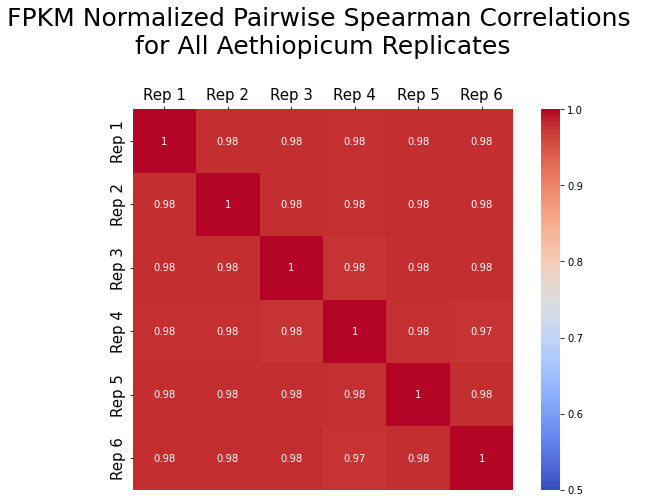

In [46]:
fig, ax = plt.subplots(figsize = (10,7))
fig.patch.set_facecolor('white')
ax = sns.heatmap(heat_map_normalized, center = .75, vmin = .5, vmax = 1, cmap = 'coolwarm',annot= True, square = True)
#plt.ylabel("Prediction Dataset", fontsize = 25)
#plt.xlabel("Target Dataset", fontsize = 25)

#sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.title("FPKM Normalized Pairwise Spearman Correlations \n for All Aethiopicum Replicates \n ", fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#ax.set_xticklabels(labels = ['Mammal Background','Plant Background','Mammal Primary Metabolism', 'Plant Primary Metabolism'])
#ax.xaxis.set_ticks

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Rep 1'),
  Text(0, 1.5, 'Rep 2'),
  Text(0, 2.5, 'Rep 3'),
  Text(0, 3.5, 'Rep 4'),
  Text(0, 4.5, 'Rep 5'),
  Text(0, 5.5, 'Rep 6')])

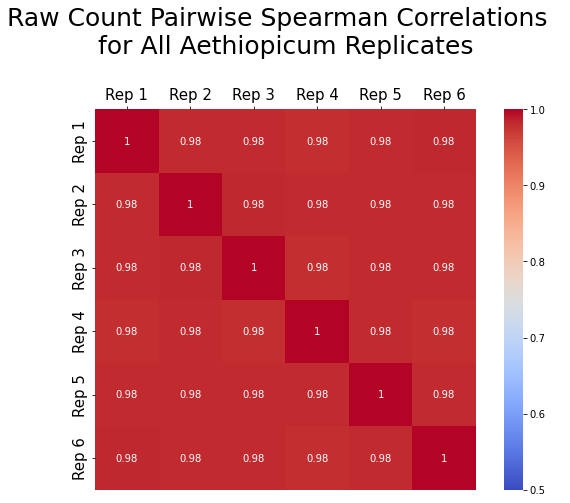

In [45]:
fig, ax = plt.subplots(figsize = (10,7))
fig.patch.set_facecolor('white')
ax = sns.heatmap(non_normalized_heatmap, center = .75, vmin = .5, vmax = 1, cmap = 'coolwarm',annot= True, square = True)
#plt.ylabel("Prediction Dataset", fontsize = 25)
#plt.xlabel("Target Dataset", fontsize = 25)

#sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.title("Raw Count Pairwise Spearman Correlations  \n for All Aethiopicum Replicates \n ", fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#ax.set_xticklabels(labels = ['Mammal Background','Plant Background','Mammal Primary Metabolism', 'Plant Primary Metabolism'])
#ax.xaxis.set_ticks

In [9]:
species_sample_one

,Gene,Count
0,Solaet3.Mg000010,0
1,Solaet3.Mg000020,0
2,Solaet3.Mg000030,0
3,Solaet3.Mg000040,0
4,Solaet3.Mg000050,0
...,...,...
41097,Solaet3.ctg00000413g000060,0
41098,Solaet3.ctg00000414g000010,0
41099,Solaet3.ctg00000414g000020,0
41100,Solaet3.ctg00000417g000010,0


In [10]:
scipy.stats.spearmanr(species_sample_one['Count'],species_sample_four['Count'])

SpearmanrResult(correlation=0.9801625302313272, pvalue=0.0)

In [8]:
species_sample_one = species_sample_one.loc[species_sample_one['Count']<20000]
species_sample_two = species_sample_two.loc[species_sample_two['Count']<20000]
species_sample_three = species_sample_three.loc[species_sample_three['Count']<20000]
species_sample_four = species_sample_four.loc[species_sample_four['Count']<20000]
species_sample_five = species_sample_five.loc[species_sample_five['Count']<20000]
species_sample_six = species_sample_six.loc[species_sample_six['Count']<20000]

In [12]:
species_sample_one = species_sample_one.loc[species_sample_one['Count']>0]
species_sample_two = species_sample_two.loc[species_sample_two['Count']>0]
species_sample_three = species_sample_three.loc[species_sample_three['Count']>0]
species_sample_four = species_sample_four.loc[species_sample_four['Count']>0]
species_sample_five = species_sample_five.loc[species_sample_five['Count']>0]
species_sample_six = species_sample_six.loc[species_sample_six['Count']>0]

(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000., 22500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

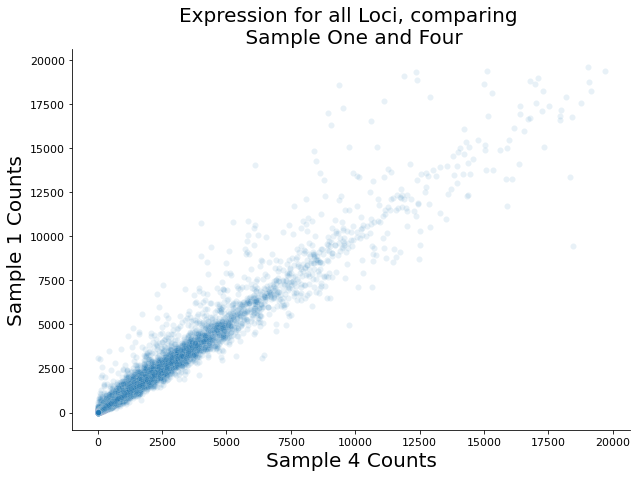

In [13]:
fig, ax = plt.subplots(figsize = (10,7))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(x = species_sample_one['Count'], y =species_sample_four['Count'], alpha = .1, edgecolors = 'none')
plt.ylabel("Sample 1 Counts", fontsize = 20)
plt.xlabel("Sample 4 Counts", fontsize = 20)

sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.title("Expression for all Loci, comparing \n Sample One and Four", fontsize = 20)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

In [9]:
combined_sample.mean(axis=1)

Gene
Solaet3.Mg000010              0.000000
Solaet3.Mg000020              0.000000
Solaet3.Mg000030              0.166667
Solaet3.Mg000040              0.000000
Solaet3.Mg000050              0.000000
                                ...   
Solaet3.ctg00000413g000060    0.000000
Solaet3.ctg00000414g000010    0.166667
Solaet3.ctg00000414g000020    0.000000
Solaet3.ctg00000417g000010    0.000000
Solaet3.ctg00000419g000010    0.000000
Length: 41102, dtype: float64

In [24]:
combined_sample_filtered = combined_sample.loc[combined_sample.mean(axis=1)>5]
combined_sample_filtered = combined_sample_filtered.loc[combined_sample_filtered.mean(axis =1)<20000]
combined_sample_filtered

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6
FEATURE_ID,,,,,,
Solaet3.Mg000090,106,129,89,87,96,139
Solaet3.Mg000130,19,6,12,12,17,14
Solaet3.Mg000140,1,8,24,8,10,16
Solaet3.Mg000170,137,86,131,75,92,146
Solaet3.Mg000200,33,43,22,16,28,29
...,...,...,...,...,...,...
Solaet3.ctg00000297g000050,11,10,16,19,15,8
Solaet3.ctg00000324g000010,53,57,45,57,71,64
Solaet3.ctg00000328g000010,61,61,63,41,32,65


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

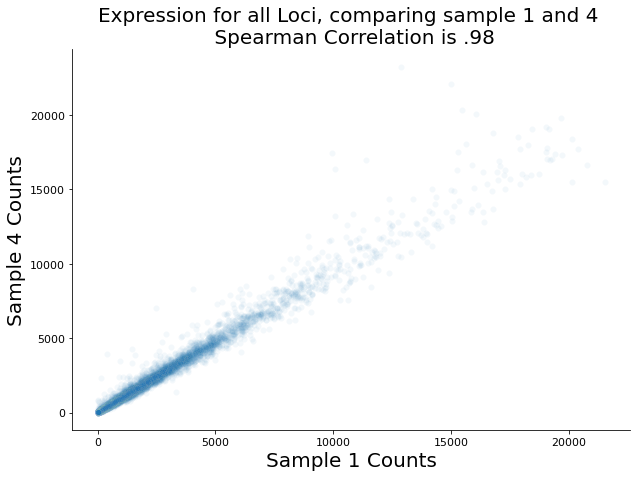

In [25]:
fig, ax = plt.subplots(figsize = (10,7))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(data = combined_sample_filtered, x = 'Rep 1', y = 'Rep 2', alpha = .05, edgecolors = 'none')
plt.ylabel("Sample 4 Counts", fontsize = 20)
plt.xlabel("Sample 1 Counts", fontsize = 20)

sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.title("Filtered Expression for all Loci, comparing sample 1 and 4 \n Spearman Correlation is .98", fontsize = 20)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

In [26]:
normalized_combined_sample_filtered = normalized_combined_sample.loc[normalized_combined_sample.mean(axis=1)>5]
normalized_combined_sample_filtered = normalized_combined_sample_filtered.loc[normalized_combined_sample_filtered.mean(axis =1)<20000]
normalized_combined_sample_filtered

,Rep 1,Rep 2,Rep 3,Rep 4,Rep 5,Rep 6
FEATURE_ID,,,,,,
Solaet3.Mg000560,7.380297,7.236257,6.966897,6.335095,4.868078,4.467660
Solaet3.Mg000650,555.328161,744.378282,622.072585,627.318185,516.409273,619.072831
Solaet3.Mg000660,148.562903,169.138968,159.078526,125.859882,125.233967,156.620859
Solaet3.Mg000670,572.775216,628.156009,593.572651,493.063163,501.657135,629.940113
Solaet3.Mg000710,6.997448,6.536737,7.792292,4.944403,6.465375,8.012205
...,...,...,...,...,...,...
Solaet3.ctg00000153g000010,6.681094,5.156374,6.873834,6.345716,5.085937,6.902134
ncRNA_Solaet3.ctg00000165g003991,6.241246,5.979962,6.832918,7.038743,4.666767,5.026118
Solaet3.ctg00000230g000100,5.432317,5.018019,5.840741,4.850773,4.492882,5.049068


(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

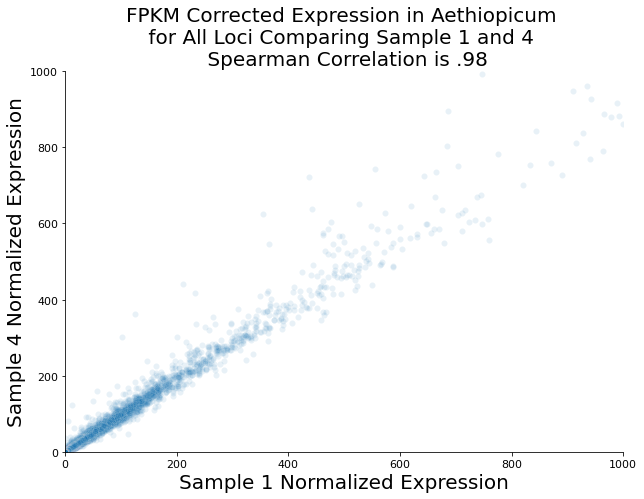

In [47]:
fig, ax = plt.subplots(figsize = (10,7))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(data = normalized_combined_sample, x = 'Rep 1', y = 'Rep 2', alpha = .1, edgecolors = 'none')
plt.ylabel("Sample 4 Normalized Expression", fontsize = 20)
plt.xlabel("Sample 1 Normalized Expression", fontsize = 20)
plt.xlim((0,1000))
plt.ylim((0,1000))
sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.title("FPKM Corrected Expression in Aethiopicum \n for All Loci Comparing Sample 1 and 4  \n Spearman Correlation is .98", fontsize = 20)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

In [20]:
scipy.stats.spearmanr(normalized_combined_sample['Rep 1'], normalized_combined_sample['Rep 4'])


SpearmanrResult(correlation=0.9768626256817995, pvalue=0.0)

In [12]:
scipy.stats.spearmanr(normalized_combined_sample_filtered['Rep 1'], normalized_combined_sample_filtered['Rep 4'])


SpearmanrResult(correlation=0.9653083349579807, pvalue=0.0)

In [15]:
scipy.stats.spearmanr(combined_sample_filtered['Rep 1'], combined_sample_filtered['Rep 4'])

SpearmanrResult(correlation=0.9862885562830976, pvalue=0.0)

<AxesSubplot:xlabel='Count', ylabel='Count'>

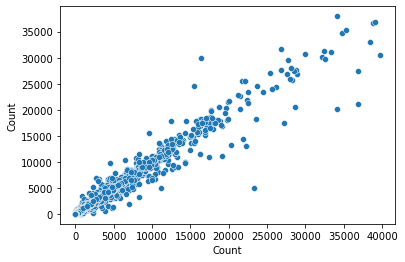

In [14]:
sns.scatterplot(x = species_sample_two['Count'], y =species_sample_three['Count'])